## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [164]:
#importing the expected needed libiraries:  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# uploading the usded data set with taking a look view via the top seven rows:
df=pd.read_csv(r'D:\1-Shakly folder\منحة وزارة الاتصالات\Data Advanced\AB analyze data project materials\ab_data.csv')
df.head(7)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# using shape to find the number of row and columns of data set:
df.shape

(294478, 5)

**The dataset contain 294478 rows and 5 columns**

c. The number of unique users in the dataset.

In [4]:
# using the nunique () to find the number of unique users in the dataset:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# calculating the proportion of users converted:

len(df[df['converted']==1])/len(df.index)

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# to calculate number of times when group is not treatment but langing page is new page:
G1 = len(df.query('group!="treatment" and landing_page=="new_page"'))

# to know how many times when group is not control but langing page is old page:
G2 = len(df.query('group!="control" and landing_page=="old_page"'))

print ('G1=',G1 ,"    ",'G2=',G2)

G1= 1928      G2= 1965


In [11]:
# to calculate the The number of times the new_page and treatment don't line up (N):

N= G1+G2
N

3893

f. Do any of the rows have missing values?

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [24]:
#using isnull sum to make sure that no null rows
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**As per the results above : there is no missing values (no null )**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [25]:
# dataframe where  treatment is not aligned with new_page or control is not aligned with old_page:

df2 = df[((df.group=='treatment') & (df.landing_page=='new_page')) | ((df.group=='control') & (df.landing_page=='old_page'))]
df2.info

<bound method DataFrame.info of         user_id                   timestamp      group landing_page  converted
0        851104  2017-01-21 22:11:48.556739    control     old_page          0
1        804228  2017-01-12 08:01:45.159739    control     old_page          0
2        661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3        853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4        864975  2017-01-21 01:52:26.210827    control     old_page          1
...         ...                         ...        ...          ...        ...
294473   751197  2017-01-03 22:28:38.630509    control     old_page          0
294474   945152  2017-01-12 00:51:57.078372    control     old_page          0
294475   734608  2017-01-22 11:45:03.439544    control     old_page          0
294476   697314  2017-01-15 01:20:28.957438    control     old_page          0
294477   715931  2017-01-16 12:40:24.467417  treatment     new_page          0

[290585 rows x 5 co

In [26]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [27]:
# using the nunique function to count the number of unique users

df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [28]:
# to make sure of the number of duplicated ids
df2['user_id'].duplicated().sum()

1

In [29]:
# to show the only repeated user id: 
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

**only one user id which repeated and this is the details of this duplicated id**

c. What is the row information for the repeat **user_id**? 

In [30]:
# to show the information about the duplicated user id:
df2.loc[df2['user_id'].duplicated()] 

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [31]:
df2.shape[0]

290585

**the number of rows for the original df2 before any removing is 290585**

In [34]:
# to drop the duplicated row :
df2=df2.drop_duplicates(subset='user_id');

# to insure that the repeated row was removed:
df2.shape[0]

290584

**the number of rows after removing the duplicates decreased by one row and became 290584**

In [35]:
# to douple check that no other duplicated row :
df2.duplicated().sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [36]:
# using the mean() to find the probability of an individual converting regardless of the page they receive:

df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [37]:
control_group = df2.query('group =="control"').converted.mean()
print(control_group)

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [38]:
treatment_group = len(df2.query('group=="treatment" and converted==1'))/len(df2.query('group=="treatment"'))
print(treatment_group)

0.11880806551510564


d. What is the probability that an individual received the new page?

In [39]:
len(df2[df2['landing_page'] == 'new_page'])/len(df2.index)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**The above quick analysis for the dataset show that there is no significant change between the new and old page. although, the conversion rate for the control group was recorded in slightly higher value (0.12) than the treatment group (0.118), this will not insure that the new page is more effective.the other factors to be considered for further investigating and demonstrating weather the old page or the new one is more effective.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**we will use hypothesis to assum the effecency of the considered new page as following:

1-We will let be the null hypothesis is that there is no difference in the proportion of conversions
between the new page and old page.

2-We will let be the alternative hypothesis is that the new page will lead to an increase in proporsion of
conversions.

-this can be written as follows:

H0

H1

H0 : p_new − p_old ≤ 0

H1 : p_new − p_old > 0 **

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [40]:
P_new = df2['converted'].mean()
print(P_new)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [41]:
# according to the above instructions which assume that the P_old = P_new :
P_old = df2['converted'].mean()
print(P_old)

0.11959708724499628


c. What is $n_{new}$?

In [42]:
# first, BY creating a dataframes for the old and new pages :
df_new_page= df2.query('landing_page == "new_page"')  # data frame for the new page

df_old_page= df2.query('landing_page == "old_page"')  # data frame for the old one

In [43]:
# what is n_new?

n_new = len(df_new_page)
print(n_new)

145310


d. What is $n_{old}$?

In [44]:
n_old = len(df_old_page)
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [75]:
# Simulate  𝑛_new  transactions with a convert rate of  𝑝_new  under the null.
# Store these  𝑛_new 1's and 0's in converted_new_page.
converted_new_page = np.random.choice([0, 1], n_new,replace=True, p = [P_new, 1-P_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [76]:
# Simulate  𝑛_𝑜𝑙𝑑  transactions with a convert rate of  𝑝_𝑜𝑙𝑑  under the null.
# Store these  𝑛_𝑜𝑙𝑑  1's and 0's in converted_new_page.

converted_old_page = np.random.choice([0, 1], n_old,replace=True, p = [P_old, 1-P_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [77]:
# obtainng the observed deferance P_OBS_DIF
P_OBS_DIF= converted_new_page.mean()-converted_old_page.mean()
P_OBS_DIF

-0.00111978802545587

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [170]:
P_diffs = []
for M in range(10000):
    # 1st parameter dictates the choices you want.  In this case [1, 0]
    converted_new_page = np.random.choice([0, 1], n_new,replace=True, p = [P_new, 1-P_new])
    converted_old_page = np.random.choice([0, 1], n_old,replace=True, p = [P_old, 1-P_old])
    P_new_fin = converted_new_page.mean()
    P_old_fin = converted_old_page.mean()
    P_diff=(P_new_fin-  P_old_fin)
    P_diffs.append(P_diff)

In [171]:
# TO CONVERT P_diffs to array:

P_diffs = np.asarray(P_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0.5, 1.0, 'Graph of the P_diffs between the new and old pages')

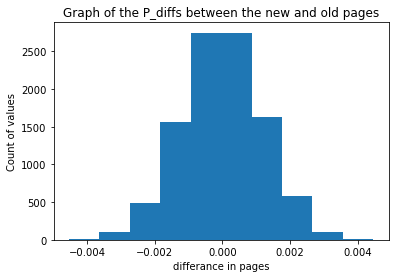

In [172]:
plt.hist(P_diffs) 
plt.xlabel('differance in pages')                                # to creat the vertical Y axis of visulaization graph
plt.ylabel('Count of values')                                   # to creat the horizental X axis of visulaization graph
plt.title('Graph of the P_diffs between the new and old pages') # to creat the title of visulaization graph


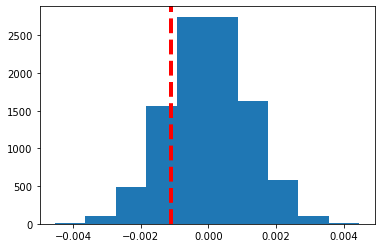

In [173]:
plt.hist(P_diffs);
plt.axvline(P_OBS_DIF,c='r',linewidth = 4, linestyle= 'dashed');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [174]:
# Calculate the actucl difference observed in ab_data

Act_old_mean = df.query('group =="control"').converted.mean()
Act_new_mean = df.query('group =="treatment"').converted.mean()
Actual_diff = Act_new_mean - Act_old_mean



# Calculate the propotion of the p_diffs are greater than the actual difference observed in ab_data.csv
(P_diffs > Actual_diff).mean()

0.8913

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The above calculated value is called p-value which is indicating that we fail to regect the null hypothises , the p-value is determined to check the validity of hypothesis wheather by accepting or regicting as follow:

-to accept the null hypothises: p-value to be greater than the suggested p-value.

-to regict the null hypothises : p_value to be smaller than alpha(.05) as the smaller p_value indicacting the stronger evedince for regecting the null hypothises.

-the resulted p-value (0.89) indicate that about 89 % of the population is above the actual mean, this assum that no significant effect for the new page so we failed to regict the null hypothses and the old page will be better for consideration**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [175]:
import statsmodels.api as smo

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query('landing_page=="old_page"'))
n_new = len(df2.query('landing_page=="new_page"'))
n_new 

145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [176]:
#  z_score and p_value calculating :
z_score, p_value = smo.stats.proportions_ztest([convert_old,convert_new], [n_old, n_new],alternative='smaller') 

# z_score and p_value demonstrating :
print("z-score= ",z_score ,',      p-value= ', p_value)

z-score=  1.3109241984234394 ,      p-value=  0.9050583127590245


In [177]:
# the significance of z_score:

from scipy.stats import norm  # imorting the needed liberary
print(norm.cdf(z_score))

0.9050583127590245


In [178]:
#how to display the value of 95% confidence ?
print(norm.ppf(1-(0.05)))

1.6448536269514722


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**According to the above results : z_score = 1.3 which is lower than the 95% confidence value (1.64).
this results confirming the former result from j that we fail to regict the hypothises so we accept the null hypothises, which mean that the new page is not effective.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**The logistic regression is required in this case**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [179]:
# to create a dummy variable column:
df2['ab_page']= pd.get_dummies(df2['group'])['treatment']
# to create intercept column
df2['intercept']= 1

# using head(7) to display the top seven rows of data:
df2.head(7)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [180]:
# importing the needed libiraries:
import statsmodels.api as smo
model=smo.Logit(df2['converted'],df2[['intercept','ab_page']])
results=model.fit() 

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [181]:
#  diplay the summary of our model results :

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 17 Jul 2022   Pseudo R-squ.:               8.077e-06
Time:                        15:33:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**p_value which display the results of regesration is (0.1899) which is higher than alpha (.05), this confirm the former results with failing to regect the hypothises**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**other factors should be added into the regression models to get an acurate decisions and to confirm the former results with different factors considering. The disadvantage is that we don't know that our additional factor will influence the result in which direction.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [182]:
# uploading the countries datafram :
countries_df = pd.read_csv(r'D:\1-Shakly folder\منحة وزارة الاتصالات\Data Advanced\AB analyze data project materials\countries.csv')
print(countries_df)

        user_id country
0        834778      UK
1        928468      US
2        822059      UK
3        711597      UK
4        710616      UK
...         ...     ...
290579   653118      US
290580   878226      UK
290581   799368      UK
290582   655535      CA
290583   934996      UK

[290584 rows x 2 columns]


In [183]:
# creating a new datafram with joining both country_df and df2:
new_df = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
new_df.head(7)

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1


In [184]:
new_df['country'].nunique()

3

the new dataframe include 3 unique countries

In [185]:
# using value_counts to display the number of values per each countries:
new_df['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [186]:
#adding dummy variables with 'US' as the baseline:
new_df[['CA', 'UK']] = pd.get_dummies(new_df['country'])[['CA', 'UK']]
new_df.head(7)


,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1,0,1
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1,0,0


In [187]:
# creating Interaction Variable between page and CA country to see if there significant effects on conversion or not:
new_df['CA_ab_page'] = new_df['CA']*new_df['ab_page']
new_df.head(7)

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,CA_ab_page
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1,0,1,0
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1,0,0,0


In [188]:
# creating Interaction Variable between page and UK country to see if there significant effects on conversion or not:
new_df['UK_ab_page'] = new_df['UK']*new_df['ab_page']
new_df.head(7)

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,CA_ab_page,UK_ab_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1,0,1,0,1
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1,0,0,0,0


In [189]:
# CHECK THE RESULTS:
log_model = smo.Logit(new_df['converted'], new_df[['intercept', 'ab_page', 'CA', 'UK', 'CA_ab_page', 'UK_ab_page']])
log_model

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [190]:
### Fit Your Linear Model And Obtain the Results

Result_2 = log_model.fit()
Result_2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 17 Jul 2022   Pseudo R-squ.:               3.482e-05
Time:                        15:33:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

**Conclusions**

**After using different testing techniques to verfy the accepting or rejecting the null hypothises, as resulted above and for all the different used methods ,p_value was higher than the alpha which confirming that no suffecent evidence for the effecency of the new page, therefor we fail to regict the hypothises and we can not suggest that new page is effective in conversion rate**